In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scikitplot as skplt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
df_all = pd.read_csv("all_matches_all_data3.csv")

/Users/lukebetham/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (42,54,345,346,347,348) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
sns.set(style="ticks", context="talk")
plt.style.use("seaborn-darkgrid")

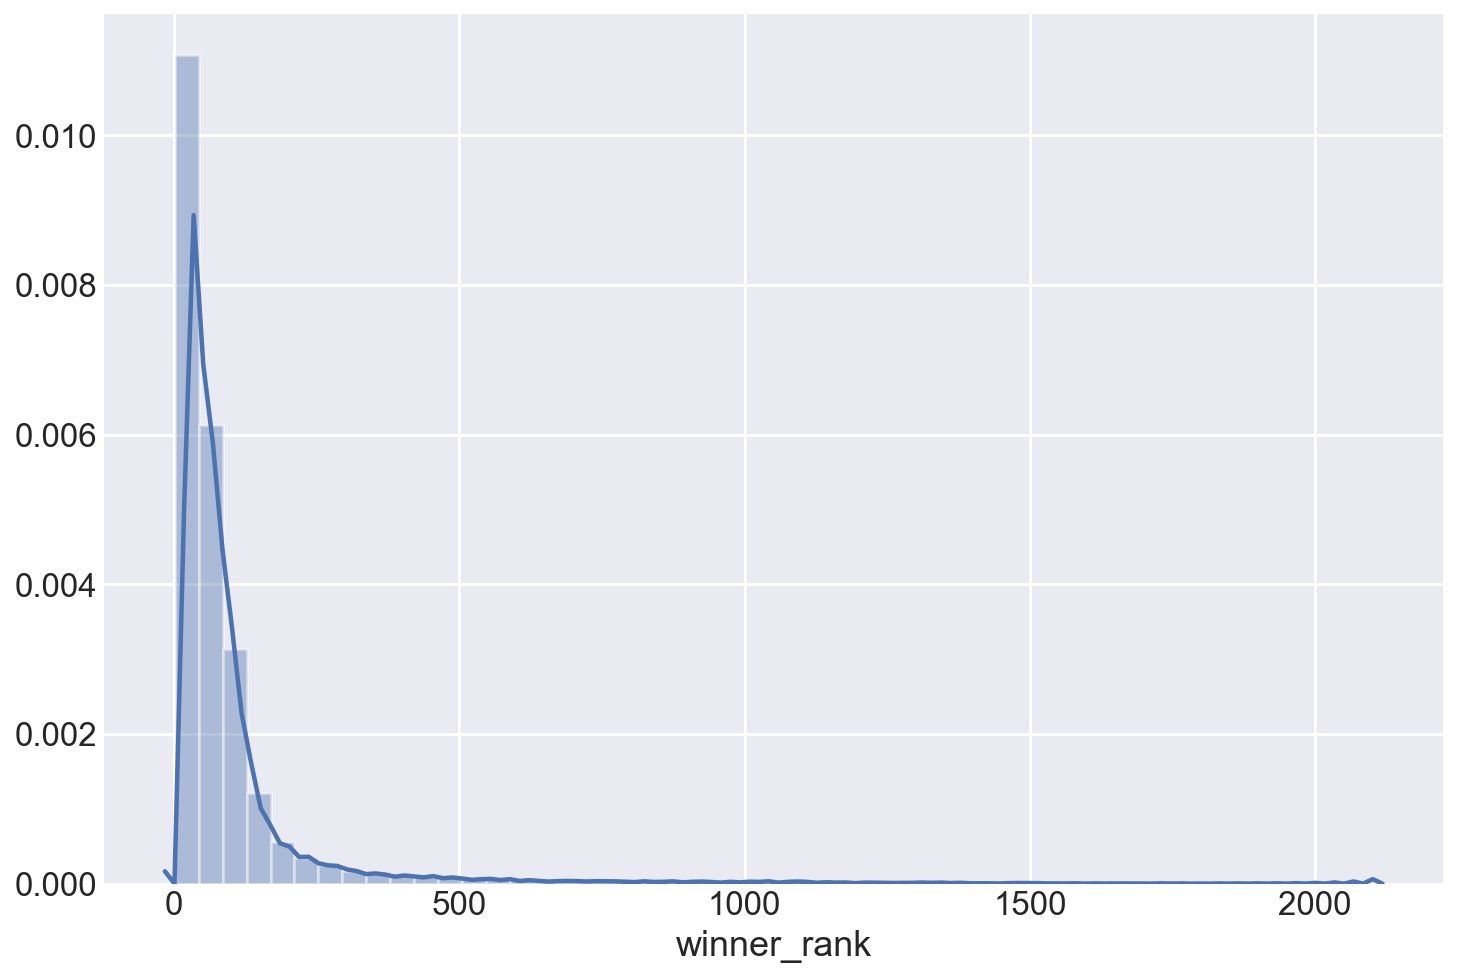

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(df_all['winner_rank'][~df_all['winner_rank'].isna()]);


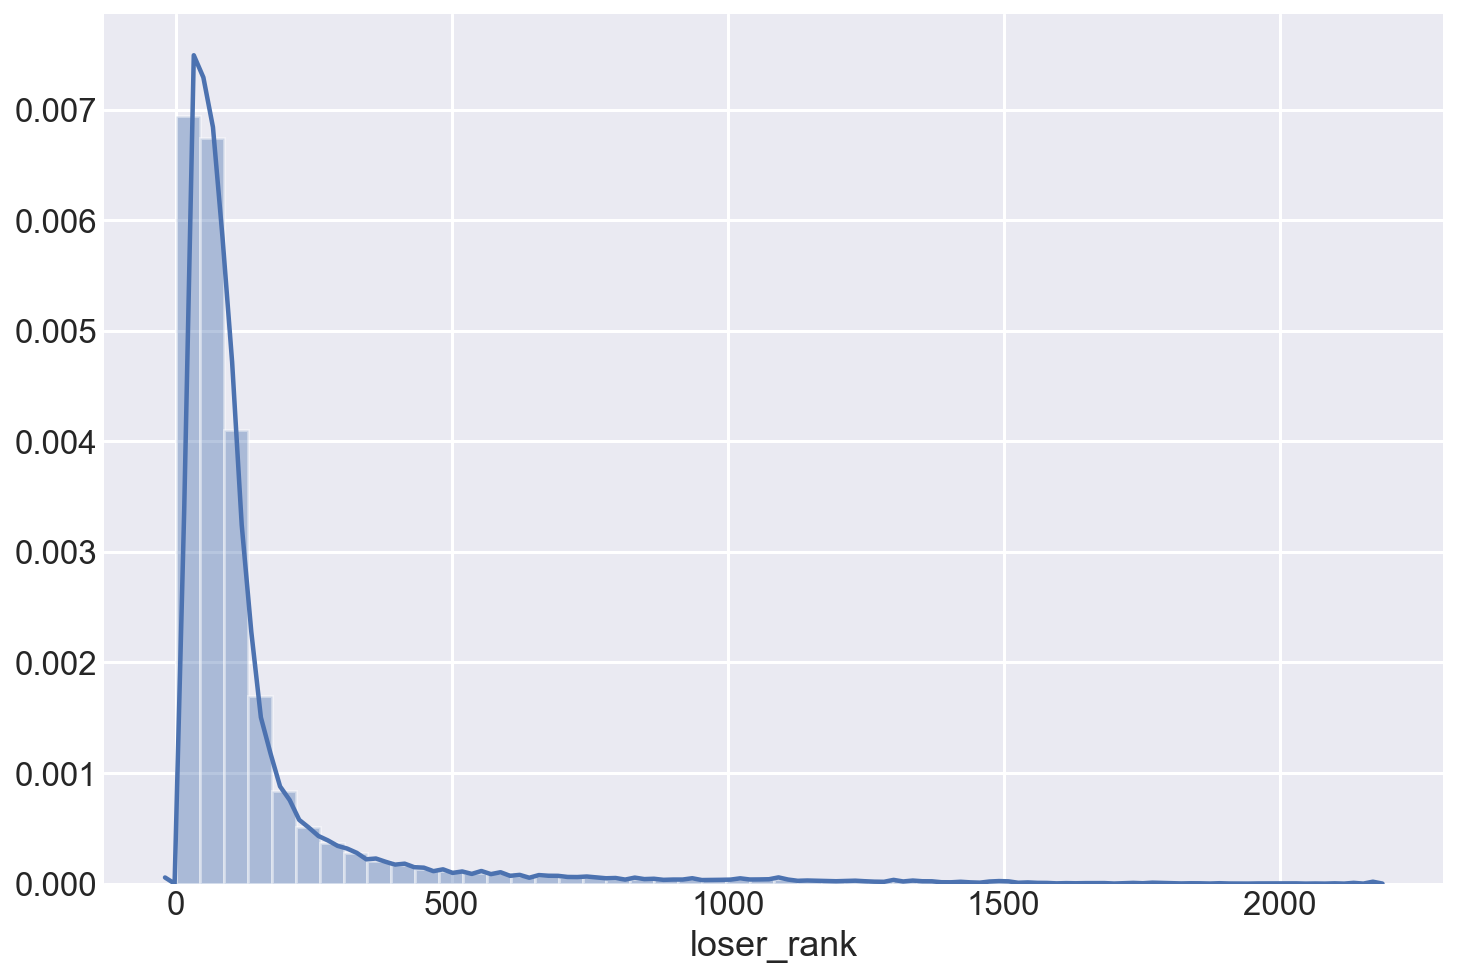

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(df_all['loser_rank'][~df_all['loser_rank'].isna()]);

In [10]:
# sns.barplot(x=df_all.groupby('winner_rank').count().winner_rank,y=df_all.groupby('winner_rank').count())

In [11]:
# df_all.groupby('winner_rank').count()

In [12]:
# win rate versus age for each tennis player
df_playa = pd.read_csv("player_season_stats.csv")
df_player= pd.read_csv("all_players.csv",low_memory=False)

In [13]:
df_playa

,player_id,season,p_matches,o_matches,p_sets,o_sets,p_games,o_games,p_tbs,o_tbs,...,o_bp_fc,minutes,matches_w_stats,sets_w_stats,games_w_stats,opponent_rank,opponent_elo_rating,p_upsets,o_upsets,matches_w_rank
0,1,1968,0.0,1.0,1.0,2.0,14.0,16.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,7.313220,1500.0,0.0,0.0,0.0
1,1,1977,0.0,1.0,0.0,2.0,1.0,12.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,4.867534,1689.0,0.0,0.0,0.0
2,2,1968,2.0,2.0,6.0,5.0,45.0,44.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,16.705882,7511.0,0.0,0.0,0.0
3,2,1969,2.0,5.0,5.0,10.0,56.0,74.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,34.376846,12824.0,0.0,0.0,0.0
4,2,1970,1.0,4.0,5.0,10.0,66.0,78.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,18.092177,9532.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26338,53992,1969,0.0,1.0,0.0,3.0,4.0,18.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.693147,2357.0,0.0,0.0,0.0
26339,53994,1970,0.0,1.0,0.0,2.0,8.0,13.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,7.313220,2009.0,0.0,0.0,0.0
26340,53995,1971,0.0,1.0,0.0,2.0,2.0,12.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,7.313220,1874.0,0.0,0.0,0.0
26341,53995,1978,0.0,1.0,0.0,2.0,2.0,12.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,4.477337,1839.0,0.0,0.0,0.0


In [14]:
df_playa2 = pd.merge(df_playa,df_player[['p1_player_id','p1_dob']],'left',left_on="player_id",right_on="p1_player_id")
df_playa2 = df_playa2.dropna(subset=['p1_dob'])
df_playa2['age'] = df_playa2.season-df_playa2['p1_dob'].apply(lambda x: float(x[:4]))
df_playa2 = df_playa2[df_playa2['age']>14]
df_playa2['win_ratio'] = df_playa2.p_matches/(df_playa2.p_matches+df_playa2.o_matches)


In [49]:
win_count = df_playa2.groupby('age').count().win_ratio
int_count = [int(x) for x in win_count.index]

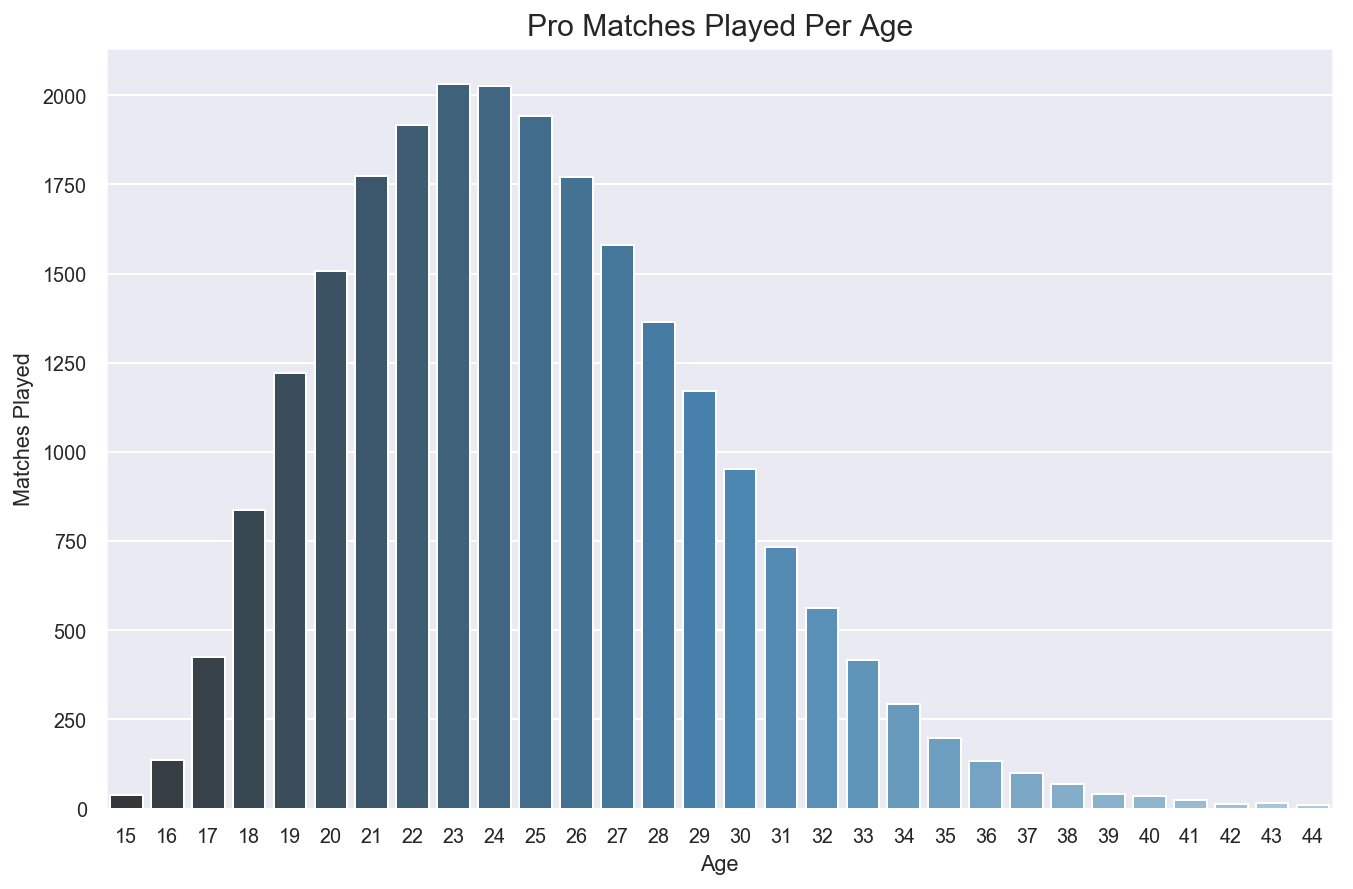

In [78]:
# number of pro tennis player per age
f, ax = plt.subplots(figsize=(11, 7))
sns.set(font_scale=0.9)
sns.barplot(x=int_count[:30],y=win_count.values[:30],palette="Blues_d");
# plt.fill_between(win_count.index, win_count.values,0,alpha=0.2)
ax.set_title('Pro Matches Played Per Age',fontsize=15);
ax.set_xlabel('Age');
ax.set_ylabel('Matches Played');

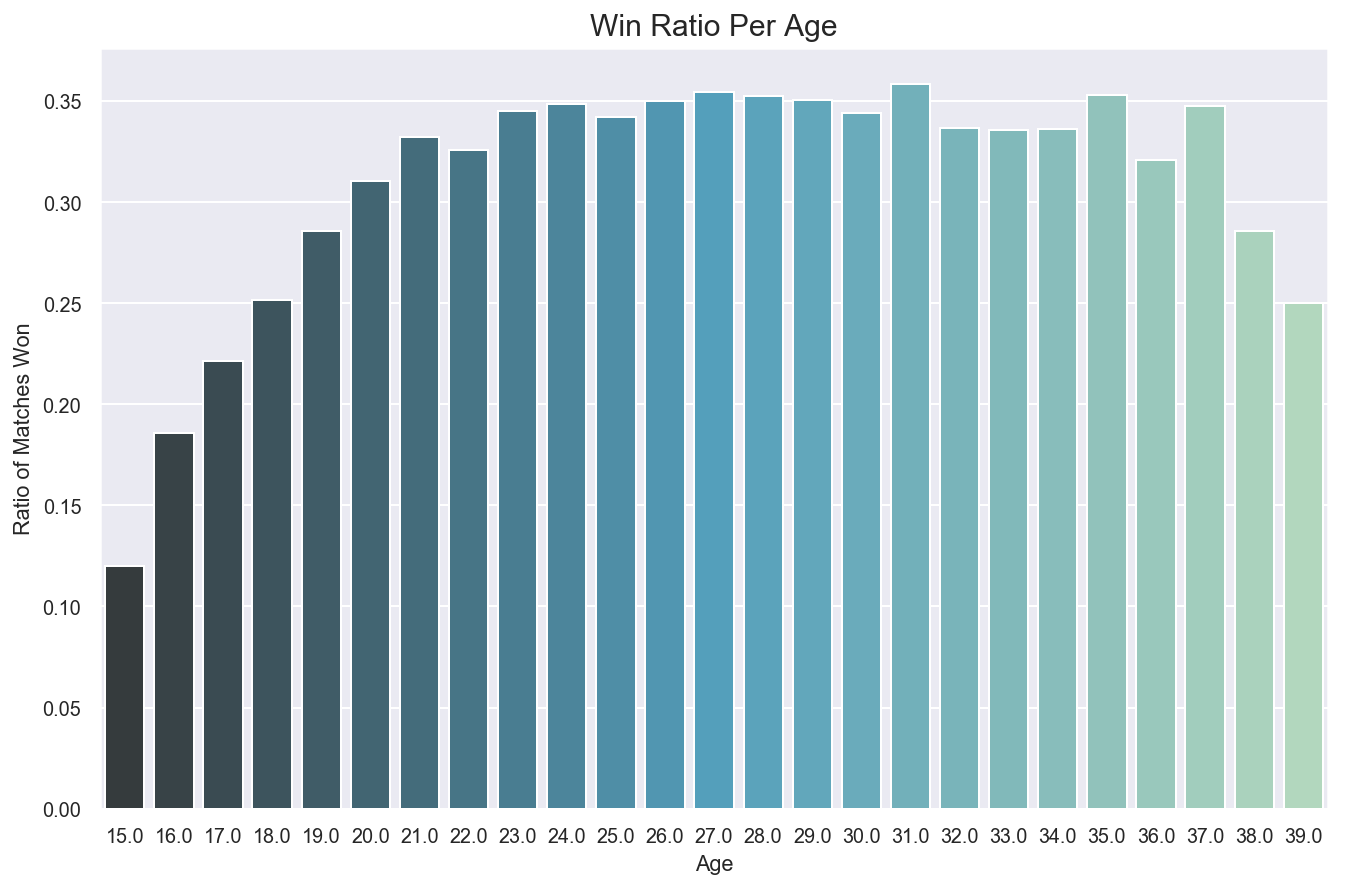

In [71]:
# average win ratio per age
df_playa3 = df_playa2[df_playa2['age']<40]
df_playa3.groupby('age').mean().win_ratio
win_rat = df_playa3.groupby('age').mean().win_ratio


f, ax = plt.subplots(figsize=(11, 7))
sns.barplot(x=win_rat.index,y=win_rat.values,palette="GnBu_d");
# plt.fill_between(win_rat.index, win_rat.values,0,alpha=0.2)
ax.set_title('Win Ratio Per Age',fontsize=15);
ax.set_xlabel('Age');
ax.set_ylabel('Ratio of Matches Won');

(22, 27.749585635359118)

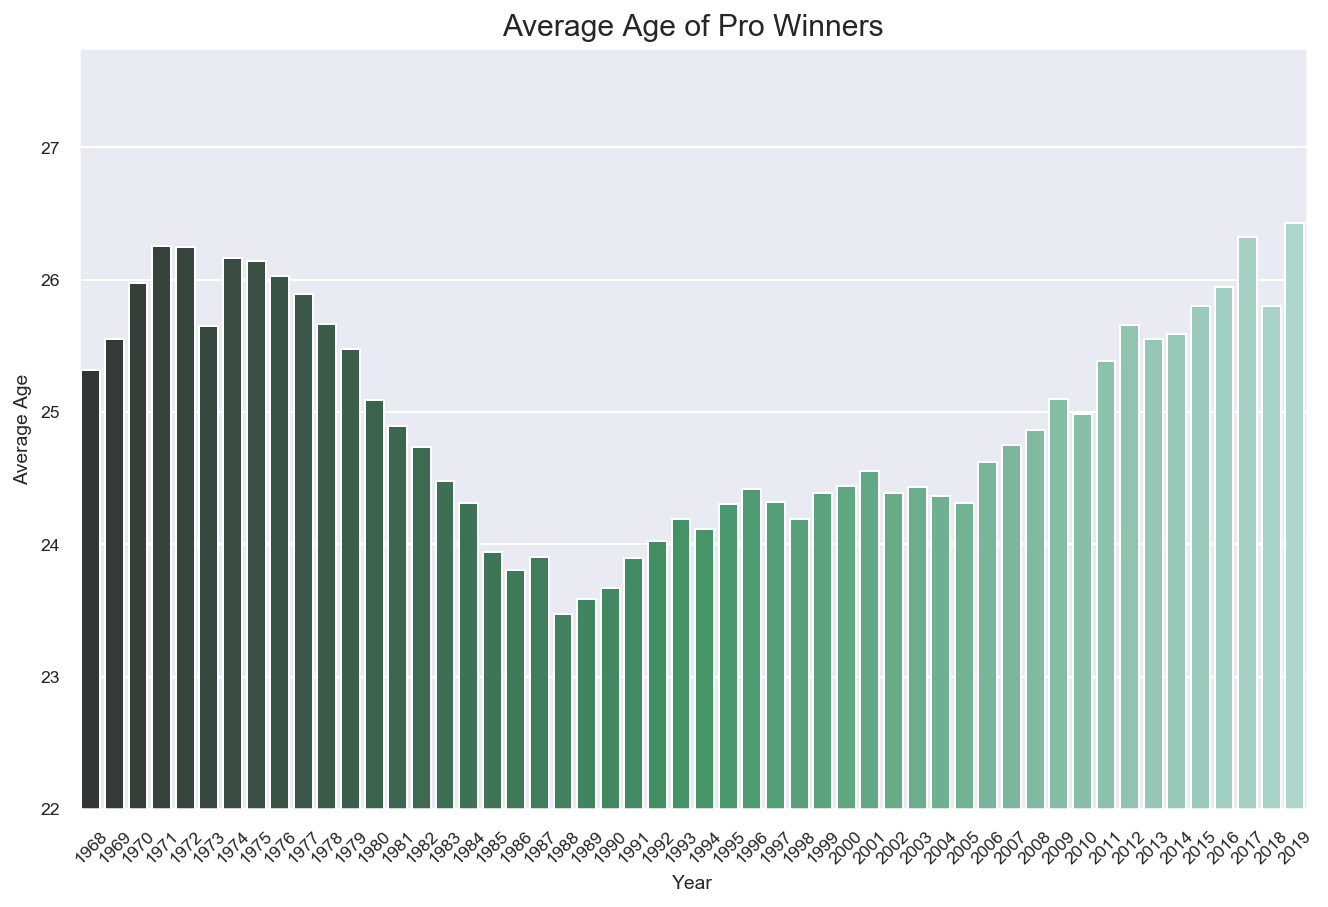

In [86]:
# average age of pro tennis players over time
mean_age = df_playa2[df_playa2['season']<2020].groupby('season').mean().age
sns.set(font_scale=0.8)

f, ax = plt.subplots(figsize=(11, 7))
sns.barplot(x=mean_age.index,y=mean_age.values,palette="BuGn_d");
# plt.fill_between(win_rat.index, win_rat.values,0,alpha=0.2)
ax.set_title('Average Age of Pro Winners',fontsize=15);
ax.set_xlabel('Year');
ax.set_ylabel('Average Age');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylim(bottom=22)

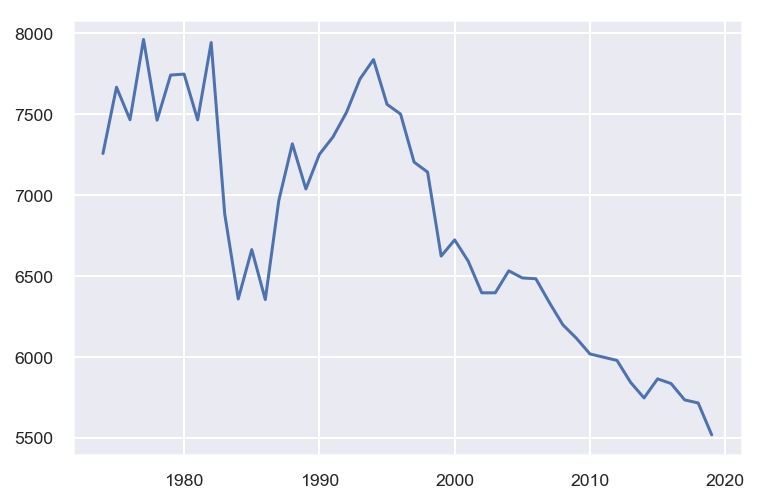

In [88]:
df_playa2['total_matches'] = df_playa2['p_matches'] + df_playa2['o_matches']
df_playa2['total_tbs'] = df_playa2['p_tbs'] + df_playa2['o_tbs']
df_playa2['total_ace'] = df_playa2['p_ace'] + df_playa2['o_ace']
df_playa2['total_df'] = df_playa2['p_df'] + df_playa2['o_df']

df_playa2['total_ace_pm'] = (df_playa2['p_ace'] + df_playa2['o_ace'])/df_playa2['total_matches']
df_playa2['total_df_pm'] = (df_playa2['p_df'] + df_playa2['o_df'])/df_playa2['total_matches']
df_playa2['total_tb_pm'] = df_playa2['total_tbs']/df_playa2['total_matches']
df_playa2['total_upsets_pm'] = (df_playa2['p_upsets'] + df_playa2['o_upsets'])/df_playa2['total_matches']
df_playa2['minutes_pm'] = df_playa2['minutes']/df_playa2['total_matches']

# matches played
sns.lineplot(data=df_playa2[(df_playa2['season']>1973)&(df_playa2['season']<2020)].groupby('season').sum().total_matches);



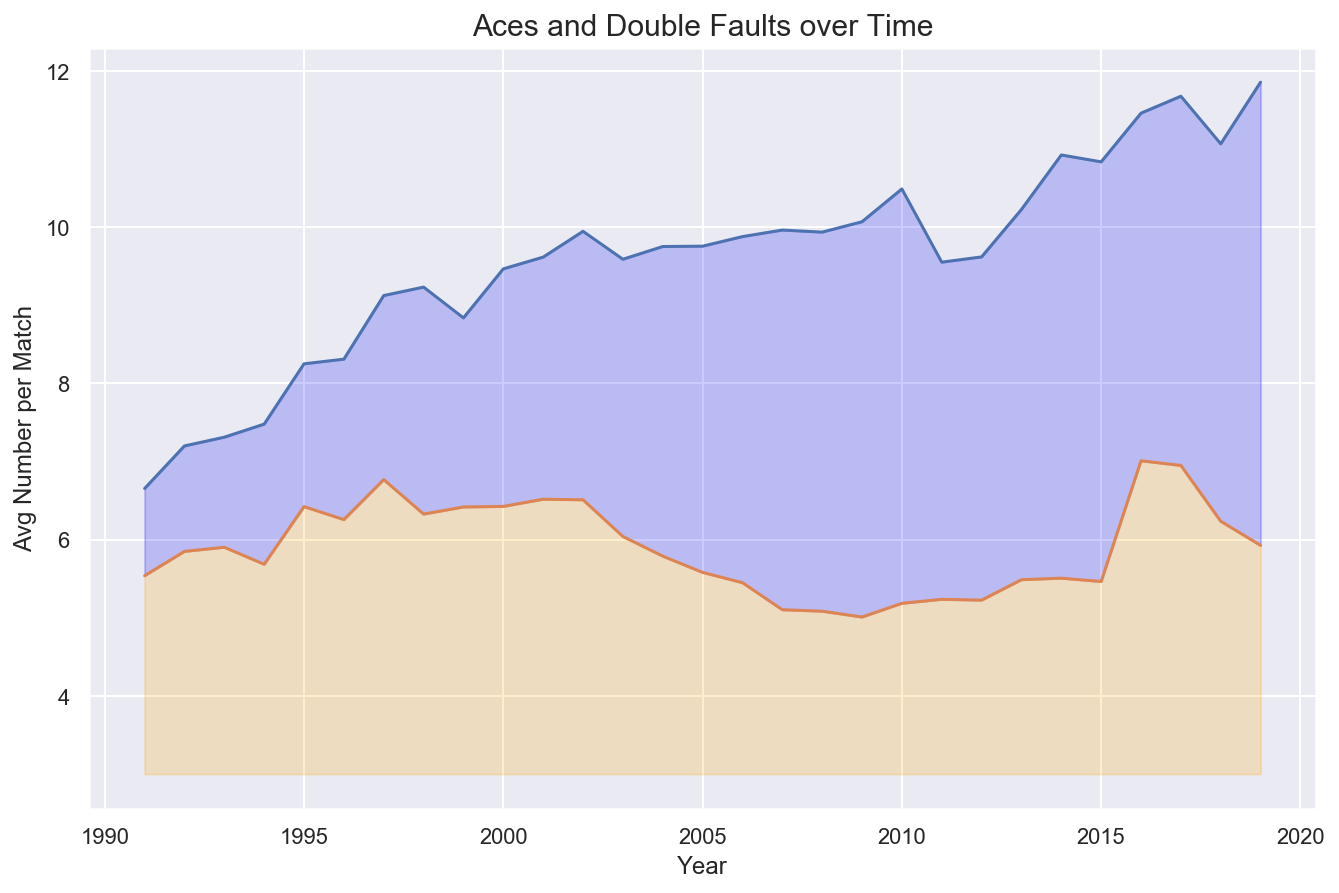

In [91]:
# aces and double faults and tbs over time
aces = df_playa2[(df_playa2['season']>1990)&(df_playa2['season']<2020)].groupby('season').mean().total_ace_pm
dfs = df_playa2[(df_playa2['season']>1990)&(df_playa2['season']<2020)].groupby('season').mean().total_df_pm
sns.set(font_scale=1)

f, ax = plt.subplots(figsize=(11, 7))

sns.lineplot(aces.index,aces.values);
sns.lineplot(dfs.index,dfs.values);
plt.fill_between(aces.index,aces.values,dfs.values,alpha=0.2,color='blue')
plt.fill_between(dfs.index,dfs.values,3,alpha=0.2,color='orange')
ax.set_title('Aces and Double Faults over Time',fontsize=15);
ax.set_xlabel('Year');
ax.set_ylabel('Avg Number per Match');
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


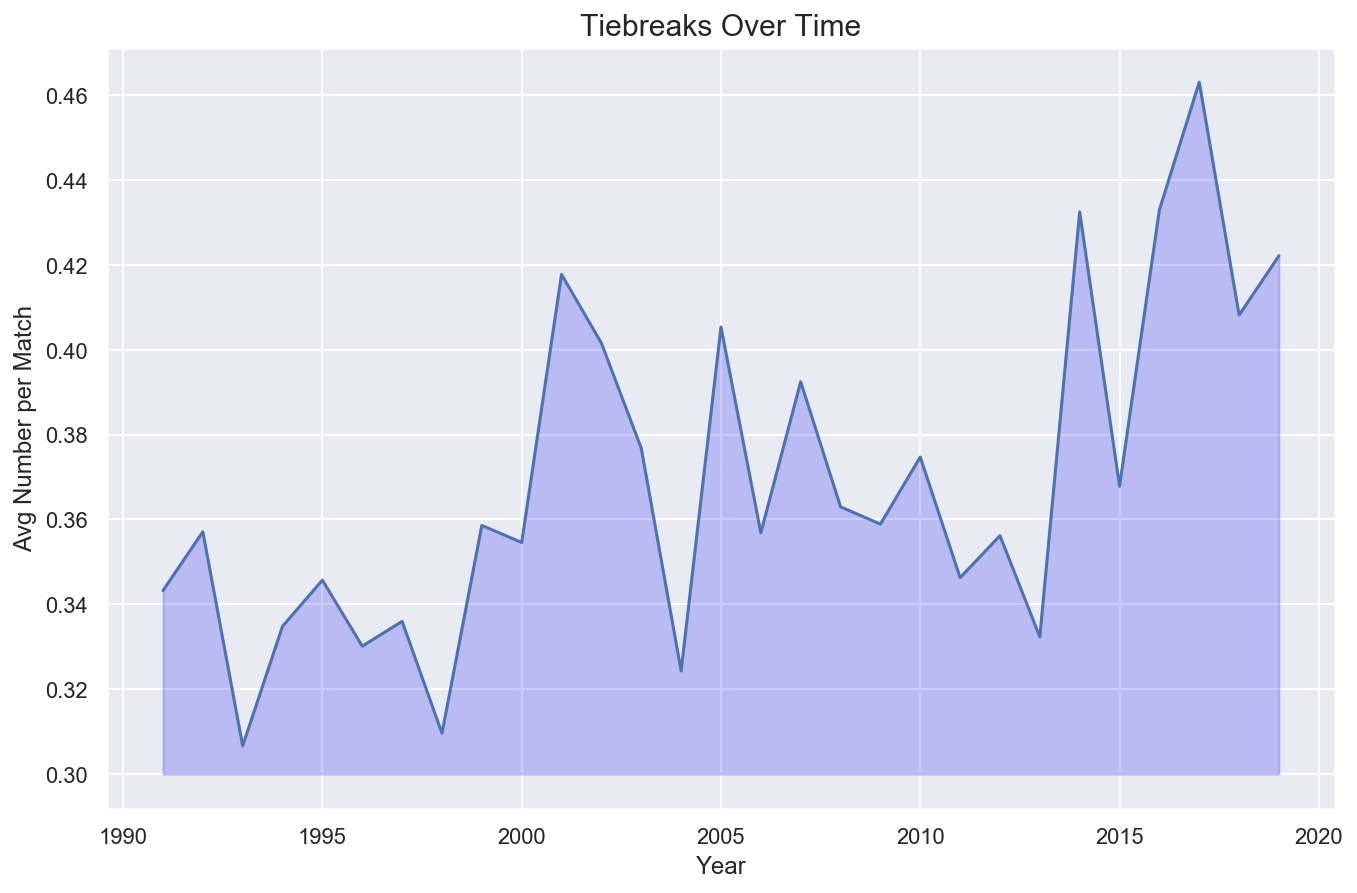

In [92]:
# tiebreaks per match
tbs = df_playa2[(df_playa2['season']>1990)&(df_playa2['season']<2020)].groupby('season').mean().total_tb_pm

f, ax = plt.subplots(figsize=(11, 7))

sns.lineplot(tbs.index,tbs.values);
plt.fill_between(tbs.index,tbs.values,0.3,alpha=0.2,color='blue')
ax.set_title('Tiebreaks Over Time',fontsize=15);
ax.set_xlabel('Year');
ax.set_ylabel('Avg Number per Match');
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

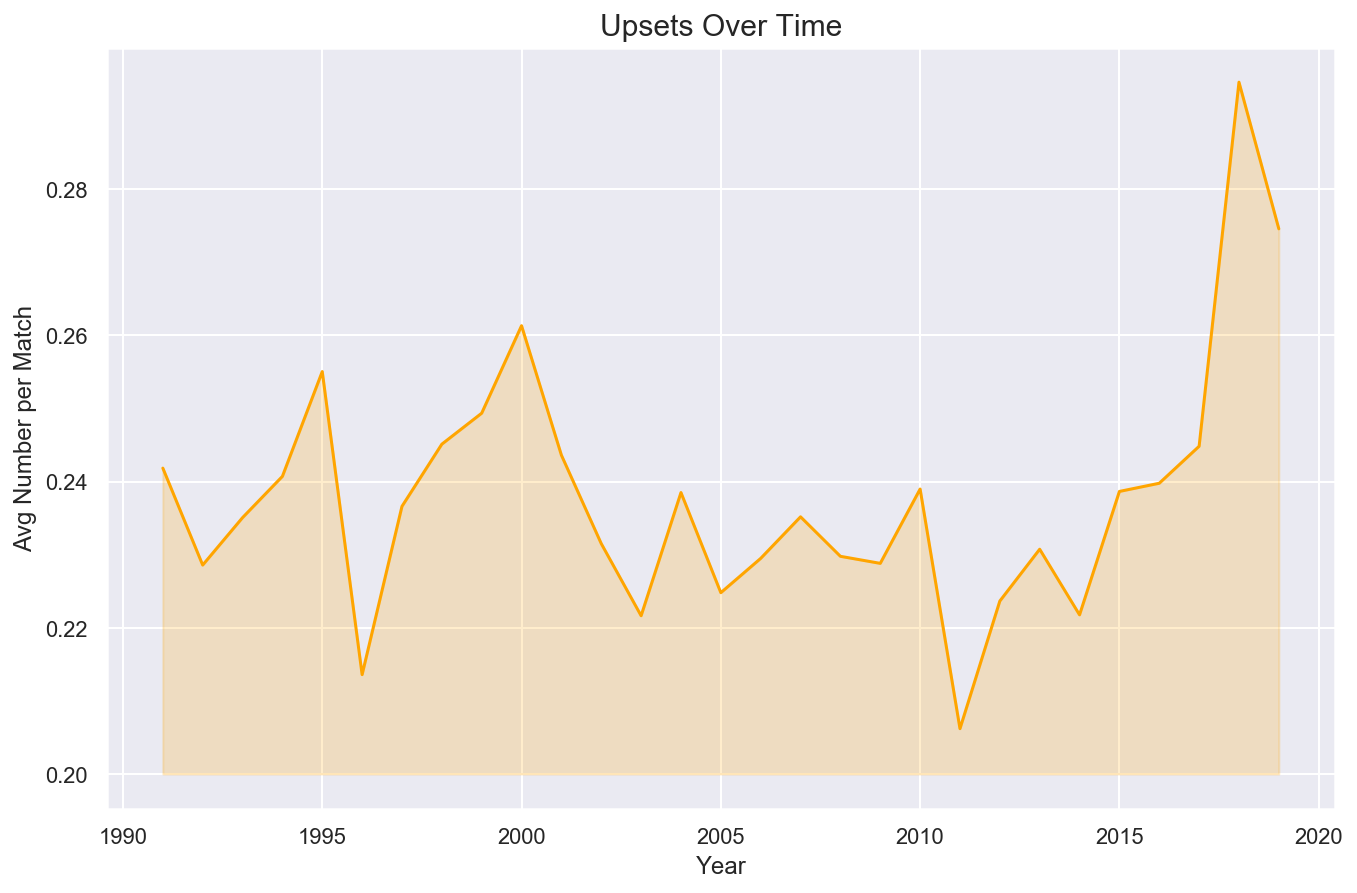

In [94]:
# upsets per match over time
upsets = df_playa2[(df_playa2['season']>1990)&(df_playa2['season']<2020)].groupby('season').mean().total_upsets_pm

f, ax = plt.subplots(figsize=(11, 7))

sns.lineplot(upsets.index,upsets.values,color='orange');
plt.fill_between(upsets.index,upsets.values,0.2,alpha=0.2,color='orange')
ax.set_title('Upsets Over Time',fontsize=15);
ax.set_xlabel('Year');
ax.set_ylabel('Avg Number per Match');

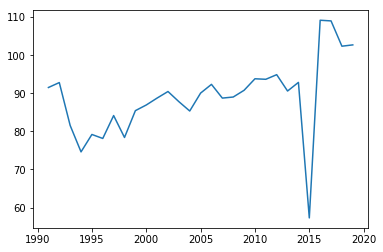

In [140]:
# minutes per match over time
sns.lineplot(data=df_playa2[(df_playa2['season']>1990)&(df_playa2['season']<2020)].groupby('season').mean().minutes_pm);


In [ ]:
# could fo some prioir posterior analysis here for age and win ratio etc

In [111]:
df_playa2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 26341
Data columns (total 41 columns):
player_id              23387 non-null int64
season                 23387 non-null int64
p_matches              23387 non-null float64
o_matches              23387 non-null float64
p_sets                 23383 non-null float64
o_sets                 23383 non-null float64
p_games                23383 non-null float64
o_games                23383 non-null float64
p_tbs                  23383 non-null float64
o_tbs                  23383 non-null float64
p_ace                  10168 non-null float64
p_df                   10168 non-null float64
p_sv_pt                10168 non-null float64
p_1st_in               10168 non-null float64
p_1st_won              10168 non-null float64
p_2nd_won              10168 non-null float64
p_sv_gms               10168 non-null float64
p_bp_sv                10168 non-null float64
p_bp_fc                10168 non-null float64
o_ace                